![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Laboratorio | Análisis de Cliente Ronda 5

Para este laboratorio, seguimos usando el archivo `marketing_customer_analysis.csv` que puede encontrar en la carpeta `files_for_lab`.

### Obtener los datos

Estamos usando el archivo `marketing_customer_analysis.csv`.

### Tratar con los datos

Ya hecho en la ronda 2.

### Explorar los datos

Hecho en la ronda 3.

### Procesando datos

(_Más procesamiento..._)

- División Xy.
- Normalizar (numérico).

In [ ]:
# Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-5/master/files_for_lab/csv_files/marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
data.shape

(9134, 24)

In [ ]:
# verificando el tipo de las columnas
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [ ]:
data['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [ ]:
# En este código convertimos los valores que tenemos como 'F' en 1 y 'M' a 2  y despues cambiamos el tipo de columna ed 'object' a 'integer'
# Esto lo realizamos para poder trabajar por ejemplo en un modelo de Regresión Lineal de minimos cuadrados y los valores sean mas precisos (ya que no nos permite trabajar 
# con valores que no sean numéricos)
data['Gender'] = data['Gender'].replace({'F': 1, 'M': 2})
data['Gender'] = data['Gender'].astype(int)

In [ ]:
# Aqui como vemos ya cambio la columna a tipo 'int'
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                             int64
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [ ]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
# checando si tenemos nulos
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### Procesando datos

- División Xy.
- Normalizar (numérico).

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# mi 'y' va a ser mi columna solita y va en minusculas
# la  'X' seran mis variables que van a predecir y que estan en tipo matriz las cuales van a ser en mayusculas

In [ ]:
# seleccionar solo las columnas de tipo numérico (para poder usar el modelo de regresión lineal se debe trabajar solo con datos numéricos)
data = data.select_dtypes(include=['float', 'int'])

In [ ]:
y=data['Income']

X=data.drop('Income',axis=1)
X=sm.add_constant(X)
model=sm.OLS(y,X).fit() 
model.summary()

# Aqui como nos damos cuenta obtuvimos un valor de R2 = 0.2 por lo cual podemos concluir que:
# 1. los datos no se comportan a una recta
# 2. Existe un error en los datos ó le falta tratamiento o alguna transformación a los datos como por ejemplo transformar alguna categoria que 
# originalmente se encontraba de tipo 'object' como fue la de 'Gender' y que al final le cambiamos le asignamos valores de 'F' = 1 Y 'M' = 2
# y despúes convertimos esa columna en tipo 'int' y asi poder trabajar con el modelo OLS, Esto lo podemos realizar con cualquier columna que sea de nuestro interes
# y asignarle valores , tratando nuestros datos y realizar una mejor predicción antes de aplicar nuestro modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     285.1
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:56:35   Log-Likelihood:            -1.0622e+05
No. Observations:                9134   AIC:                         2.125e+05
Df Residuals:                    9125   BIC:                         2.125e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3.439e+04   1397.527     24.610      0.000    3.17e+04    3.71e+04
Customer Lifetime Value           0.0950      0.045      2.103      0.036       0.006       0.184
Gender                         1677.0526    571.815      2.933      0.003     556.168    2797.937
Monthly Premium Auto            299.4817     11.343     26.403      0.000     277.248     321.716
Months Since Last Claim         -76.2517     28.279     -2.696      0.007    -131.684     -20.819
Months Since Policy Inception    -7.9662     10.207     -0.780      0.435     -27.974      12.042
Number of Open Complaints       121.9005    312.693      0.390      0.697    -491.048     734.849
Number of Policies              -88.9064    119.103     -0.746      0.455    -322.376     144.563
Total Claim Amount              -60.2682      1.270    -47.458      0.000     -62.758     -57.779
==============================================================================
Omnibus:                      430.957   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.955
Skew:                           0.365   Prob(JB):                     1.23e-70
Kurtosis:                       2.440   Cond. No.                     5.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X

,const,Customer Lifetime Value,Gender,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,1.0,2763.519279,1,69,32,5,0,1,384.811147
1,1.0,6979.535903,1,94,13,42,0,8,1131.464935
2,1.0,12887.431650,1,108,18,38,0,2,566.472247
3,1.0,7645.861827,2,106,18,65,0,7,529.881344
4,1.0,2813.692575,2,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9129,1.0,23405.987980,2,73,18,89,0,2,198.234764
9130,1.0,3096.511217,1,79,14,28,0,1,379.200000
9131,1.0,8163.890428,2,85,9,37,3,2,790.784983
9132,1.0,7524.442436,2,96,34,3,0,3,691.200000


In [ ]:
# Para realizar un apredicción del modelo creamos una variable y colocamos por ejemplo los datos del primer renglón
variable=[1,2763.519279,1,69,32,5,0,1,384.811147] 
model.predict(variable)

array([31236.45853324])

In [ ]:
model.predict(X)

0       31236.458533
1       -5343.833263
2       33645.236324
3       35771.088360
4       50197.536190
            ...     
9129    47626.306299
9130    35790.387696
9131    15526.534975
9132    22671.853190
9133    37745.877351
Length: 9134, dtype: float64

In [ ]:
# nos damos cuenta como se comportan las columnas de acuerdo con nuestra variable 'y' y efectivamente nos damos cuenta que no se parece a una recta

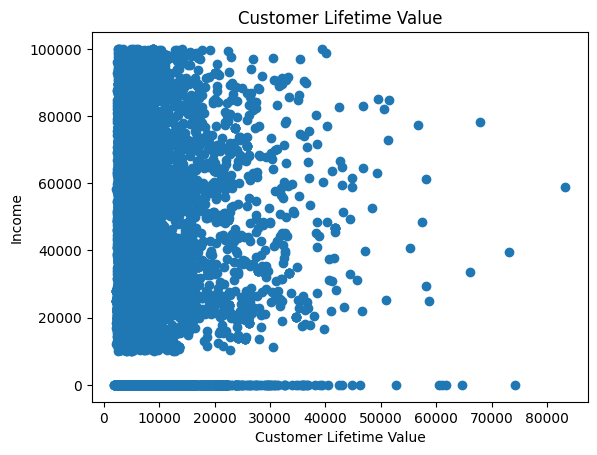

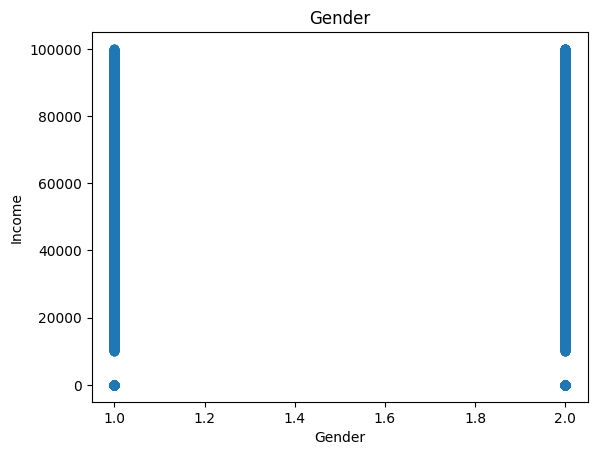

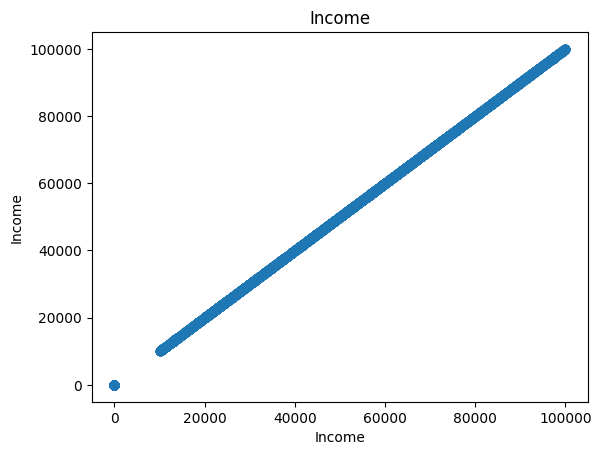

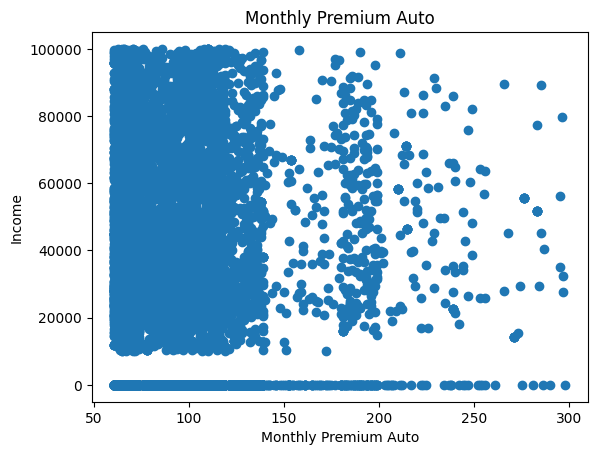

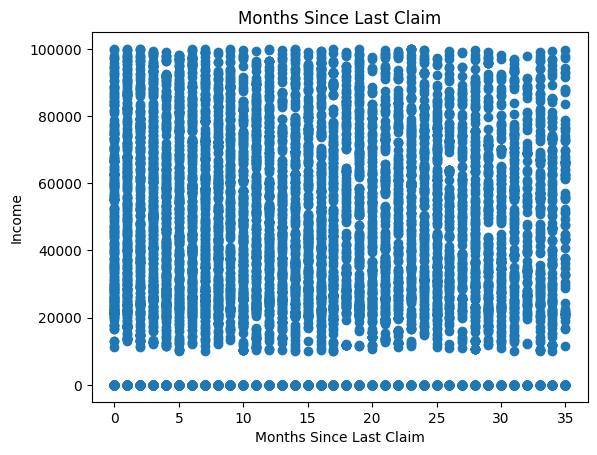

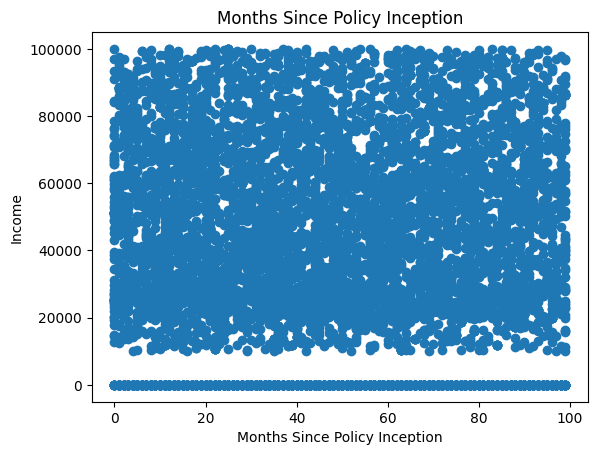

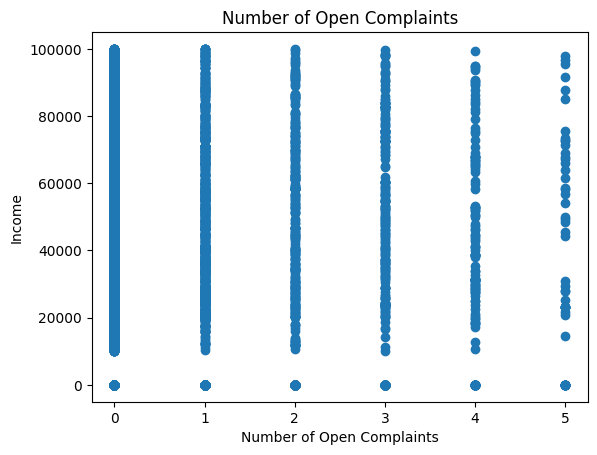

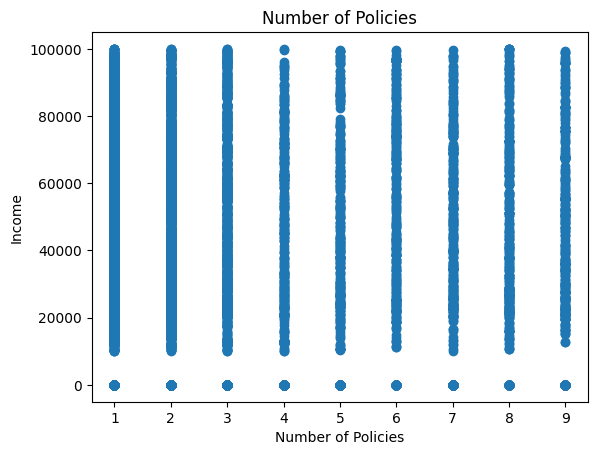

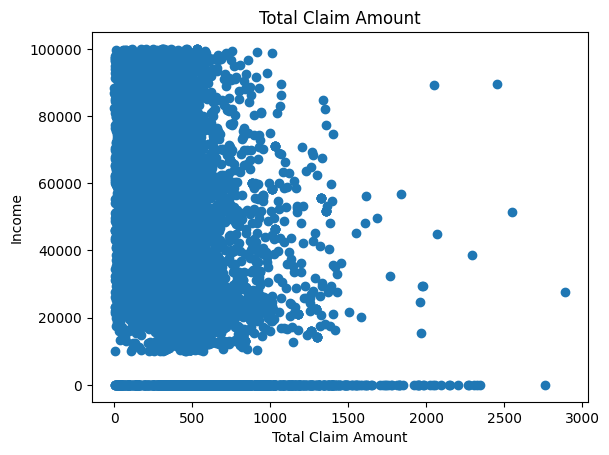

In [ ]:
for i in data.columns:
  plt.title(i)
  plt.plot(data[i],data['Income'],'o')
  plt.xlabel(i)
  plt.ylabel('Income')
  plt.show()

In [ ]:
# checando lo mismo que hicimos arriba pero con regresión lineal
lm = linear_model.LinearRegression()
y=data['Income']
X=data.drop('Income',axis=1)
model = lm.fit(X,y)


In [ ]:
# aqui nos damos cuenta como se comporta la predicción y efectivamente se comporta igual este modelo (Regresión Lineal al de OLS)
lm.predict(X)

array([31236.45853324, -5343.83326345, 33645.23632355, ...,
       15526.53497454, 22671.85318994, 37745.87735052])

- Normalizar (numérico).

In [ ]:
data

,Customer Lifetime Value,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,1,56274,69,32,5,0,1,384.811147
1,6979.535903,1,0,94,13,42,0,8,1131.464935
2,12887.431650,1,48767,108,18,38,0,2,566.472247
3,7645.861827,2,0,106,18,65,0,7,529.881344
4,2813.692575,2,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,2,71941,73,18,89,0,2,198.234764
9130,3096.511217,1,21604,79,14,28,0,1,379.200000
9131,8163.890428,2,0,85,9,37,3,2,790.784983
9132,7524.442436,2,21941,96,34,3,0,3,691.200000


In [ ]:
# vamos a utilizar las columnas ['Monthly Premium Auto'], ['Months Since Last Claim'] Y ['Months Since Policy Inception']
data_2 = data.select_dtypes(include=['int', 'float']).iloc [:,[3,4,5]]
data_2

,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,69,32,5
1,94,13,42
2,108,18,38
3,106,18,65
4,73,12,44
...,...,...,...
9129,73,18,89
9130,79,14,28
9131,85,9,37
9132,96,34,3


<Axes: xlabel='Monthly Premium Auto', ylabel='Density'>

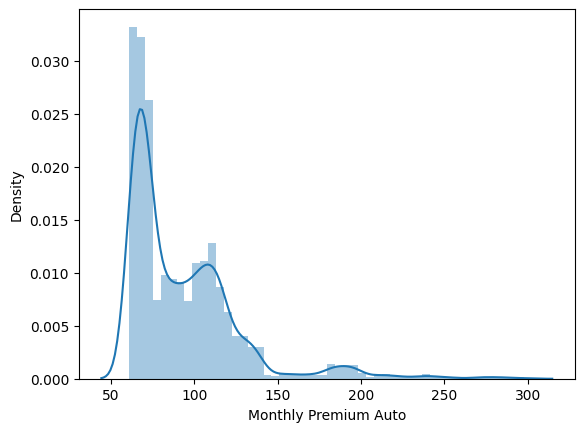

In [ ]:
# Checando y graficando las columnas seleccionadas
sns.distplot(data ['Monthly Premium Auto'])

<Axes: xlabel='Months Since Last Claim', ylabel='Density'>

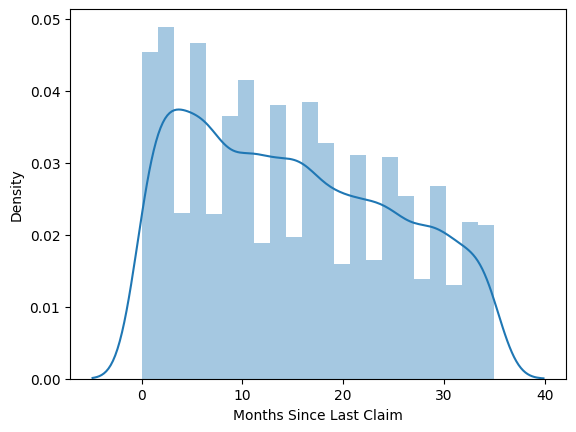

In [ ]:
sns.distplot(data ['Months Since Last Claim'])

<Axes: xlabel='Months Since Policy Inception', ylabel='Density'>

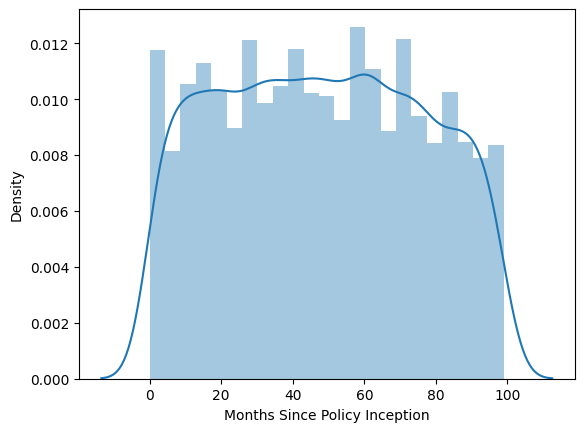

In [ ]:
sns.distplot(data ['Months Since Policy Inception'])

In [ ]:
from sklearn.preprocessing import Normalizer

X_num = data.drop('Total Claim Amount', axis=1)
transformer = Normalizer().fit(X_num)
x_norm = transformer.fit_transform(X_num)

X_num

,Customer Lifetime Value,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,1,56274,69,32,5,0,1
1,6979.535903,1,0,94,13,42,0,8
2,12887.431650,1,48767,108,18,38,0,2
3,7645.861827,2,0,106,18,65,0,7
4,2813.692575,2,43836,73,12,44,0,1
...,...,...,...,...,...,...,...,...
9129,23405.987980,2,71941,73,18,89,0,2
9130,3096.511217,1,21604,79,14,28,0,1
9131,8163.890428,2,0,85,9,37,3,2
9132,7524.442436,2,21941,96,34,3,0,3


<Axes: ylabel='Density'>

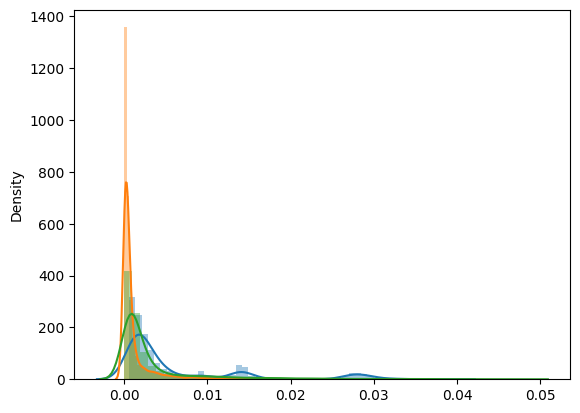

In [ ]:
transformer = Normalizer().fit(X_num) 
X_normalized = transformer.transform (X_num) 

sns.distplot(X_normalized.T [3])  # Monthly Premium Auto
sns.distplot(X_normalized.T [4])  # Months Since Last Claim
sns.distplot(X_normalized.T [5])  # Months Since Policy Inception

<Axes: ylabel='Density'>

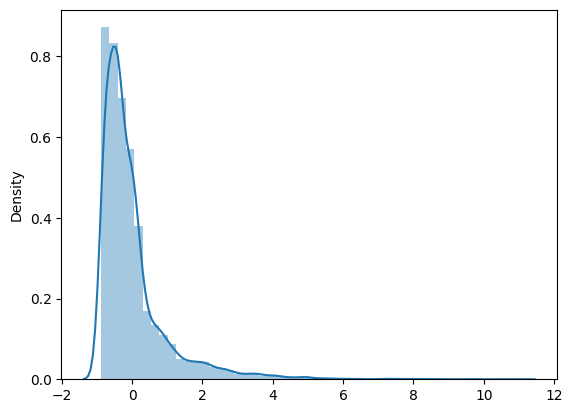

In [ ]:
# Revisando como quedo con sklearn
from sklearn.preprocessing import StandardScaler
X_num = data.drop('Total Claim Amount',axis=1)
transformer = StandardScaler().fit(X_num)
x_ss = transformer.transform(X_num)
x_ss = x_ss.T
sns.distplot(x_ss[0])

<Axes: xlabel='Months Since Policy Inception', ylabel='Density'>

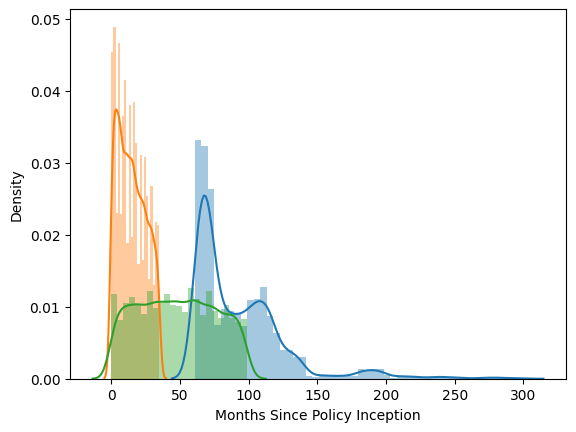

In [ ]:
sns.distplot(data ['Monthly Premium Auto'])
sns.distplot(data ['Months Since Last Claim'])
sns.distplot(data ['Months Since Policy Inception'])

<Axes: >

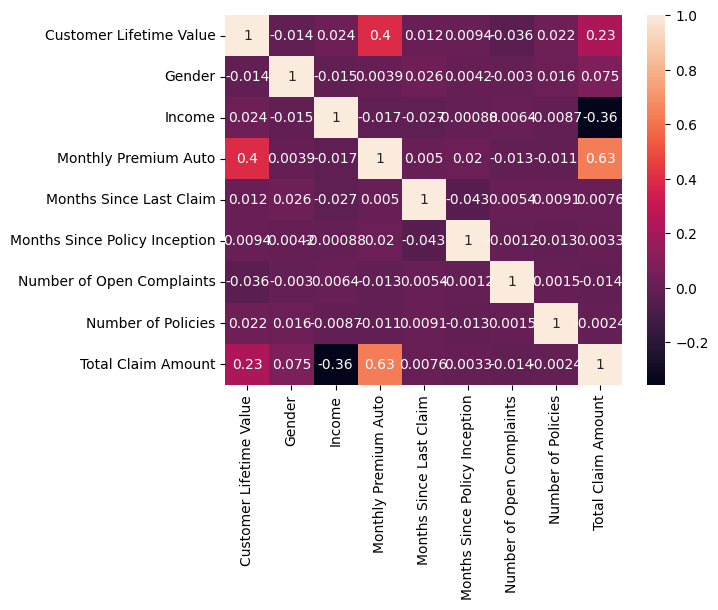

In [ ]:
# calculando la correlación de data y visualizandolo en un heatmap
# vemos que no tenemos una correlación en las columnas mas que  una correlación media entre Monthly Premium Auto y Total Claim Amount
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)